In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
pd.set_option('display.max_rows',200)

In [4]:
df1 = pd.read_excel('Live_Tables_1006-1009.ods',sheet_name='Live_Table_1008C',header=1,na_values='..')
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,CurrentONS code,Lower and Single Tier Authority Data,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,...,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,NaN,NaN,29674,65721,63736,70390,74530,56544,47464,...,58346,43077,43124,65959,32614,42195,47069,57175,58900,52100
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
years = list(range(1992,2022))
df2 = df1.loc[:,('Unnamed: 1','Unnamed: 2')]
df2.rename(columns={'Unnamed: 1':'LA_code','Unnamed: 2':'LA'},inplace=True)
df2.head(20)

,LA_code,LA
0,NaN,NaN
1,CurrentONS code,Lower and Single Tier Authority Data
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,E12000001,NaN
6,NaN,NaN
7,E07000157,Alnwick
8,E07000158,Berwick-upon-Tweed
9,E07000159,Blyth Valley


In [7]:
df1.shape

(456, 32)

In [8]:
columns = []
for x in range(3,33):
    columns.append(f'Unnamed: {x}')
for x in range(len(years)):
    df2[years[x]] = df1[columns[x]]

In [9]:
df2 = df2[~df2.loc[:,'LA'].isnull()]
df2.drop(index=[1,431,433],inplace=True)
df2.reset_index(drop=True,inplace=True)

In [10]:
df2.tail(30)
# what do null values mean?

,LA_code,LA,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
370,E07000050,North Dorset,20,119,74,65,117,209,103,58,...,144,57,103,81,44,52,9,3,NaN,NaN
371,E06000024,North Somerset,0,0,8,0,0,46,113,35,...,41,226,200,188,126,141,105,35,99,109
372,E07000231,North Wiltshire,43,150,125,138,128,73,183,119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,E07AHS438,Northavon,25,26,62,119,147,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,E07000023,Penwith,22,96,32,89,102,131,165,174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,E06000026,Plymouth,221,259,401,618,575,242,310,333,...,310,275,183,396,321,170,171,500,234,105
376,E06000029,Poole,76,218,211,324,260,151,195,153,...,2,42,4,38,18,62,22,99,NaN,NaN
377,E07000051,Purbeck,3,163,108,25,103,143,58,146,...,10,13,20,1,53,23,6,18,NaN,NaN
378,E07000024,Restormel,38,116,122,88,125,67,76,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,E07000232,Salisbury,41,125,203,192,230,205,139,104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df2 = pd.melt(df2,id_vars=['LA_code','LA'],var_name='year',value_name='new_dwellings')

In [12]:
df2.shape

(12000, 4)

In [16]:
df_cov = df2[df2.loc[:,'LA']=='Coventry']

In [17]:
df_cov['shortfall'] = 348 - df_cov['new_dwellings']


C:\Users\adnaa\AppData\Local\Temp\ipykernel_145848\3049177722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov['shortfall'] = 348 - df_cov['new_dwellings']


In [18]:
df_cov.head()

,LA_code,LA,year,new_dwellings,shortfall
147,E08000026,Coventry,1992,127,221
547,E08000026,Coventry,1993,331,17
947,E08000026,Coventry,1994,474,-126
1347,E08000026,Coventry,1995,371,-23
1747,E08000026,Coventry,1996,315,33


In [19]:
np.mean(df_cov['shortfall'])

74.46666666666667

C:\Users\adnaa\AppData\Local\Temp\ipykernel_145848\3143195835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov['date'] = years


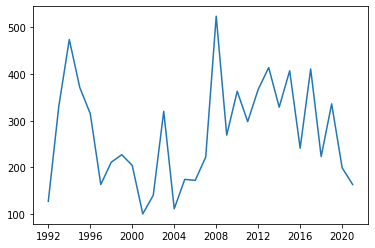

In [20]:
years = pd.to_datetime(df_cov.year,format='%Y')
df_cov['date'] = years


Text(0, 0.5, 'Number of dwellings')

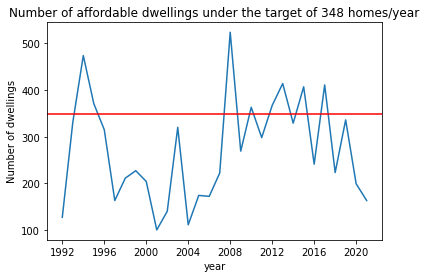

In [30]:
x = df_cov['date']
y1 = df_cov['new_dwellings']
y2 = df_cov['shortfall']
plt.plot(x,y1)
plt.axhline(y=348,color='r')
#plt.plot(x,y2)
plt.title('Number of affordable dwellings under the target of 348 homes/year')
plt.xlabel('year')
plt.ylabel('Number of dwellings')

In [31]:
np.mean(df_cov[df_cov.loc[:,'year']>=2011]['shortfall'])

40.0